In [177]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression


# 1. Изучение работы оптического пирометра

In [178]:
class PyrometerData:
    def __init__(self, real_temp, pyro_temp, millivolts, isup):
        self.real_temp = real_temp
        self.pyro_temp = pyro_temp
        self.millivolts = millivolts
        self.isup = isup

    def __str__(self):
        return f"{self.real_temp:.0f}\t& {self.pyro_temp:4.0f}\t& {self.millivolts}\t& {100 * np.abs(1 - self.real_temp / self.pyro_temp):.1f}\t & {'вверх' if self.isup else 'вниз':5s}\t \\\ \\hline"

In [179]:
data = np.array([
    PyrometerData(962,      963,    36.82, True ),
    PyrometerData(968,      973,    39.03, False),
    PyrometerData(969,      989,    39.09, True ),
    PyrometerData(973,      997,    39.14, False),
    PyrometerData(974,      1008,   39.16, True ),
    PyrometerData(977,      1010,   39.27, False),
    PyrometerData(978,      993,    39.31, True ),
    PyrometerData(979,      1007,   39.38, False ),
    PyrometerData(970,      1004,   39.04, True ),
    PyrometerData(965,      1001,   38.76, False ),
])

In [180]:
for data_line in data:
    print(data_line)

962	&  963	& 36.82	& 0.1	 & вверх	 \\ \hline
968	&  973	& 39.03	& 0.5	 & вниз 	 \\ \hline
969	&  989	& 39.09	& 2.0	 & вверх	 \\ \hline
973	&  997	& 39.14	& 2.4	 & вниз 	 \\ \hline
974	& 1008	& 39.16	& 3.4	 & вверх	 \\ \hline
977	& 1010	& 39.27	& 3.3	 & вниз 	 \\ \hline
978	&  993	& 39.31	& 1.5	 & вверх	 \\ \hline
979	& 1007	& 39.38	& 2.8	 & вниз 	 \\ \hline
970	& 1004	& 39.04	& 3.4	 & вверх	 \\ \hline
965	& 1001	& 38.76	& 3.6	 & вниз 	 \\ \hline


# 3. Проверка закона Стефана-больцмана


In [181]:
class LampData:
    def __init__(self, visual_temp, current, voltage):
        self.visual_temp = visual_temp # В цельсиях
        self.voltage = voltage
        self.current = current

        self.real_temp = self._compute_real_temp()
        self.power = self._compute_power()
        self.epsilon = self._get_nearest_epsilon()


    def _compute_real_temp(self):
        K_BRIGHNTESS_TERM = 1.06 # Коэффициенты прямой с графика
        B_BRIGHNTESS_TERM = -30

        self.real_temp = K_BRIGHNTESS_TERM * (self.visual_temp + 273) + B_BRIGHNTESS_TERM # Сразу считаем в кельвинах

        return self.real_temp

    def _compute_power(self):
        self.power = self.voltage * self.current
        return self.power

    def _get_nearest_epsilon(self):
        epsilons = {
            800: 0.067,
            900: 0.081,
            1000: 0.105,
            1100: 0.119,
            1200: 0.133,
            1300: 0.144,
            1400: 0.164,
            1500: 0.179,
            1600: 0.195,
            1700: 0.209,
            1800: 0.223,
            1900: 0.236,
            2000: 0.249
        }

        epsilons_val = list(epsilons.values())
        epsilons_keys = list(epsilons.keys())

        # до 1400 пытаемся найти ближайший eps.,
        # после 1400 зависимость линейная -- можно аппроксимировать
        index_of_linear_start = 6 # после 6-го значения (1400) начинается линейная часть
        best_temp_idx = (np.abs(np.array(epsilons_keys) - self.real_temp)).argmin()

        if (best_temp_idx < index_of_linear_start):
            self.epsilon = epsilons_val[best_temp_idx]

        else:
            self.epsilon = (epsilons_val[-1] - epsilons_val[index_of_linear_start]) / \
                            (epsilons_keys[-1] - epsilons_keys[index_of_linear_start]) * \
                            (self.real_temp - epsilons_keys[6]) + epsilons_val[index_of_linear_start]

        return self.epsilon

    def print_result(self):
        print(f"{self.visual_temp:4d}\t & {self.real_temp:4.0f}\t & {self.power:1.2f} \\\ \\hline")

    def __str__(self):
        return f"{self.visual_temp:4d}\t & {self.voltage:1.2f}\t & {self.current:1.3f} \\\ \\hline"

In [182]:
data = np.array([
    LampData(900,  0.449, 1.48),
    LampData(1000, 0.495, 1.86),
    LampData(1100, 0.550, 2.35),
    LampData(1200, 0.611, 2.94),
    LampData(1300, 0.628, 3.11),
    LampData(1400, 0.692, 3.78),
    LampData(1500, 0.800, 5.01),
    LampData(1600, 0.869, 5.87),
    LampData(1700, 0.998, 7.61),
    LampData(1800, 1.011, 7.82),
    LampData(1900, 1.031, 8.12),
])

In [183]:
for line in data:
    print(line)

 900	 & 1.48	 & 0.449 \\ \hline
1000	 & 1.86	 & 0.495 \\ \hline
1100	 & 2.35	 & 0.550 \\ \hline
1200	 & 2.94	 & 0.611 \\ \hline
1300	 & 3.11	 & 0.628 \\ \hline
1400	 & 3.78	 & 0.692 \\ \hline
1500	 & 5.01	 & 0.800 \\ \hline
1600	 & 5.87	 & 0.869 \\ \hline
1700	 & 7.61	 & 0.998 \\ \hline
1800	 & 7.82	 & 1.011 \\ \hline
1900	 & 8.12	 & 1.031 \\ \hline


In [184]:
for line in data:
    line.print_result()

 900	 & 1213	 & 0.66 \\ \hline
1000	 & 1319	 & 0.92 \\ \hline
1100	 & 1425	 & 1.29 \\ \hline
1200	 & 1531	 & 1.80 \\ \hline
1300	 & 1637	 & 1.95 \\ \hline
1400	 & 1743	 & 2.62 \\ \hline
1500	 & 1849	 & 4.01 \\ \hline
1600	 & 1955	 & 5.10 \\ \hline
1700	 & 2061	 & 7.59 \\ \hline
1800	 & 2167	 & 7.91 \\ \hline
1900	 & 2273	 & 8.37 \\ \hline


# Строим графики
сначала аппроксимируем логарифмическую зависимость, а затем по ней сторим обычный и логарифмический графики


In [196]:
def get_line (x, y, num_dots=100):
    model = LinearRegression().fit(x.reshape(-1, 1), y)

    k = model.coef_[0]
    b = model.intercept_

    X = np.linspace(x.min(), x.max(), num_dots)
    Y = model.predict(X.reshape(-1, 1))

    return (X, Y), k, b

\ln (\eps_T \sigma S) &= -32.43 \pm 0.01
n &= 4.49 \pm 0.12


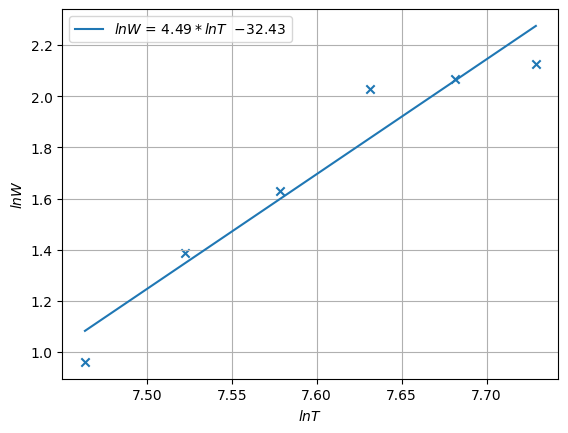

In [240]:
# для логарифмического графика берем только значения больше 1700K (так указано в лабнике)

treshhold = 1700
powers = np.array([line.power for line in data if line.real_temp >= treshhold])
log_powers = np.log(powers)

real_temps = np.array([line.real_temp for line in data if line.real_temp >= treshhold])
log_real_temps = np.log(real_temps)

S = 0.36 / 10**6 # площадь проволоки в м^2

(temp_plot_data, w_plot_data), k, b = get_line(log_real_temps, log_powers)
print (f"\ln (\eps_T \sigma S) &= {b:.2f} \pm 0.01")
print (f"n &= {k:.2f} \pm 0.12")

plt.grid()
plt.xlabel ('$lnT$',)
plt.ylabel ('$lnW$')

plt.scatter(log_real_temps, log_powers, marker='x')
plt.plot(temp_plot_data, w_plot_data, label=f"$lnW$ = ${k:.2f}*lnT$ {'+' if b > 0 else ''} ${b:.2f}$")
plt.legend()

plt.savefig("log_plot.png")
plt.show()


In [253]:
S = 0.36  # cм^2
k_B = 1.38049e-23
c = 2.997928e10

treshhold = 1700
powers = np.array([line.power for line in data if line.real_temp >= treshhold])
real_temps = np.array([line.real_temp for line in data if line.real_temp >= treshhold])
epsilons = np.array([line.epsilon for line in data if line.real_temp >= treshhold])

sigmas = powers / epsilons / S / np.power (real_temps, 4)
planks_constants = np.power ((2 * np.pi**5 * k_B**4 / 15 / c**2) / sigmas, 1.0 / 3)


for temp in real_temps:
    print(f"{temp:4.0f}", end='\t & ')

print()

for sigma in sigmas:
    print(f"${sigma:.2e}$", end='\t & ')

print()

for planks_constant in planks_constants:
    print(f"${planks_constant:.2e}$", end="\t & ")

1743	 & 1849	 & 1955	 & 2061	 & 2167	 & 2273	 & 
$3.70e-12$	 & $4.18e-12$	 & $3.99e-12$	 & $4.53e-12$	 & $3.65e-12$	 & $3.03e-12$	 & 
$7.64e-34$	 & $7.33e-34$	 & $7.45e-34$	 & $7.14e-34$	 & $7.67e-34$	 & $8.17e-34$	 & 

[1213.38       1221.09970752 1228.86852899 1236.68677688 1244.55476565
 1252.47281176 1260.44123367 1268.4603519  1276.53048897 1284.65196947
 1292.82512007 1301.05026949 1309.32774855 1317.6578902  1326.04102946
 1334.47750353 1342.96765173 1351.51181554 1360.11033861 1368.76356679
 1377.47184812 1386.23553286 1395.05497349 1403.93052473 1412.86254358
 1421.85138929 1430.89742339 1440.00100974 1449.16251448 1458.38230611
 1467.66075544 1476.99823568 1486.39512238 1495.8517935  1505.3686294
 1514.94601285 1524.58432906 1534.28396571 1544.04531291 1553.86876328
 1563.75471194 1573.7035565  1583.71569711 1593.79153648 1603.93147987
 1614.13593512 1624.40531266 1634.74002553 1645.14048942 1655.60712263
 1666.14034615 1676.74058364 1687.40826144 1698.14380863 1708.947657
 1719.82024108 1730.7619982  1741.77336843 1752.85479467 1764.00672263
 1775.22960084 1786.5238807  1797.89001649 1809.32846535 1820.83968736
 1832.42414551 1844.08230573 1855.81463694 1867.62161102 1879.50370286
 1891.461

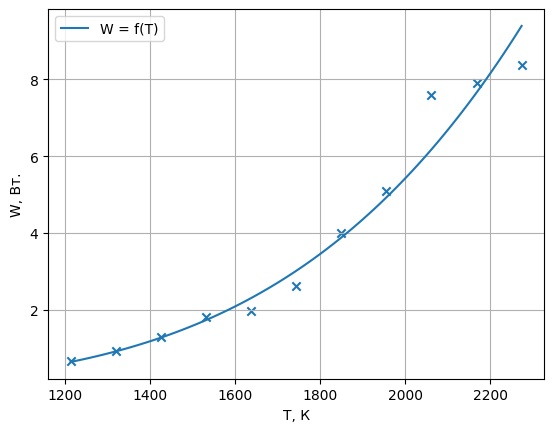

In [236]:

powers = np.array([line.power for line in data])
log_powers = np.log(powers)

real_temps = np.array([line.real_temp for line in data])
log_real_temps = np.log(real_temps)

S = 0.36 / 10**6 # площадь проволоки в м^2

(temp_data, w_data), k, b = get_line(log_real_temps, log_powers)

exp_b = np.exp(b)
temp_data = np.exp(temp_data)
w_data =  np.power(temp_data, k) * exp_b # lnW = k*lnT + b ==> W =  exp(lnT*k + b) = (T^k)*exp(b)

print(temp_data)
print(w_data)

plt.grid()
plt.xlabel ('T, К',)
plt.ylabel ('W, Вт.')

plt.scatter(real_temps, powers, marker='x')
plt.plot(temp_data, w_data, label=f"W = f(T)")
plt.legend()

plt.savefig("regular_plot.png")
plt.show()